# Using PixelLib
   **Semantic Segmentation** - objects classified with the same pixel values are segmented with the same colormaps
   **Instance Segmentation** - different instances of the same object are segmented with different color maps

In [1]:
import matplotlib.pyplot as plt
import cv2
from pixellib.semantic import semantic_segmentation

# Using deeplab
___

In [2]:
semantic_seg = semantic_segmentation()

semantic_seg.load_pascalvoc_model('weights/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5') 

In [3]:
original_img = cv2.imread('data/test_img.png')
original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)

seg_values, seg_overlay = semantic_seg.segmentAsPascalvoc(image_path='data/test_img.png',
                                                          overlay=True)

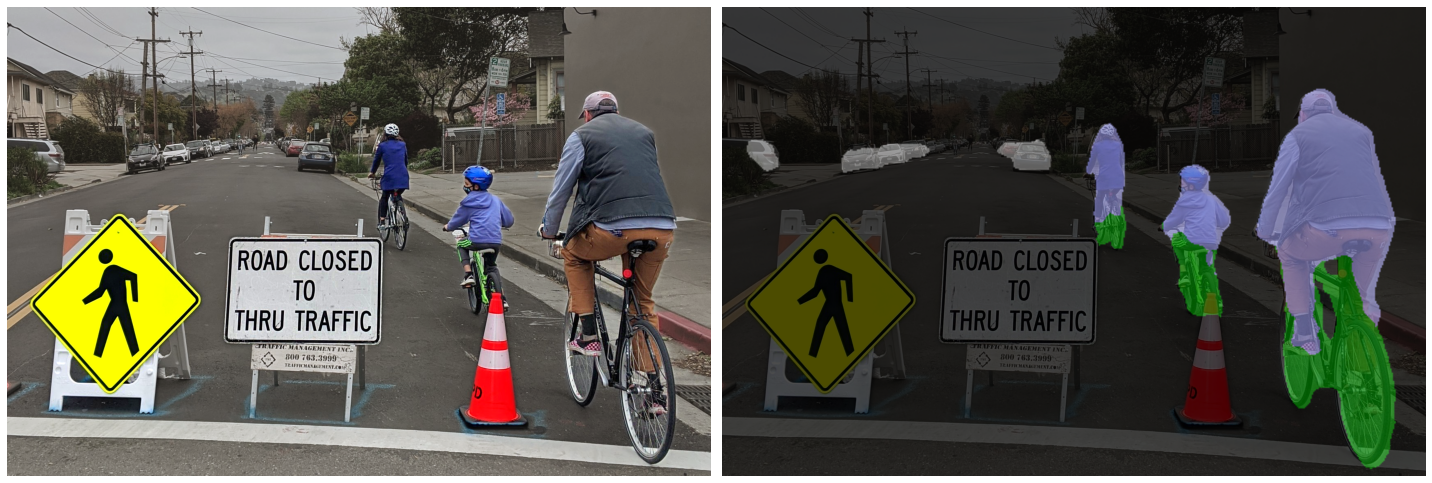

In [4]:
fig, axs = plt.subplots(1, 2, figsize=(20, 20))
[axes.axis('off') for axes in axs]

axs[0].imshow(original_img)
axs[1].imshow(seg_overlay)

plt.tight_layout()
plt.show()

# Using Mask-RCNN coco
___

In [5]:
from pixellib.instance import instance_segmentation

/home/folley/.pyenv/versions/3.7.9/lib/python3.7/site-packages/skimage/io/manage_plugins.py:23: UserWarning: Your installed pillow version is < 7.1.0. Several security issues (CVE-2020-11538, CVE-2020-10379, CVE-2020-10994, CVE-2020-10177) have been fixed in pillow 7.1.0 or higher. We recommend to upgrade this library.
  from .collection import imread_collection_wrapper


In [6]:
instance_seg = instance_segmentation()

instance_seg.load_model('weights/mask_rcnn_coco.h5')

Instructions for updating:
Use fn_output_signature instead


In [7]:
original_img = cv2.imread('data/test_2.jpg')
original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)

seg_mask, seg_res = instance_seg.segmentImage('data/test_2.jpg',
                                              show_bboxes= True)

/home/folley/.pyenv/versions/3.7.9/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:2464: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


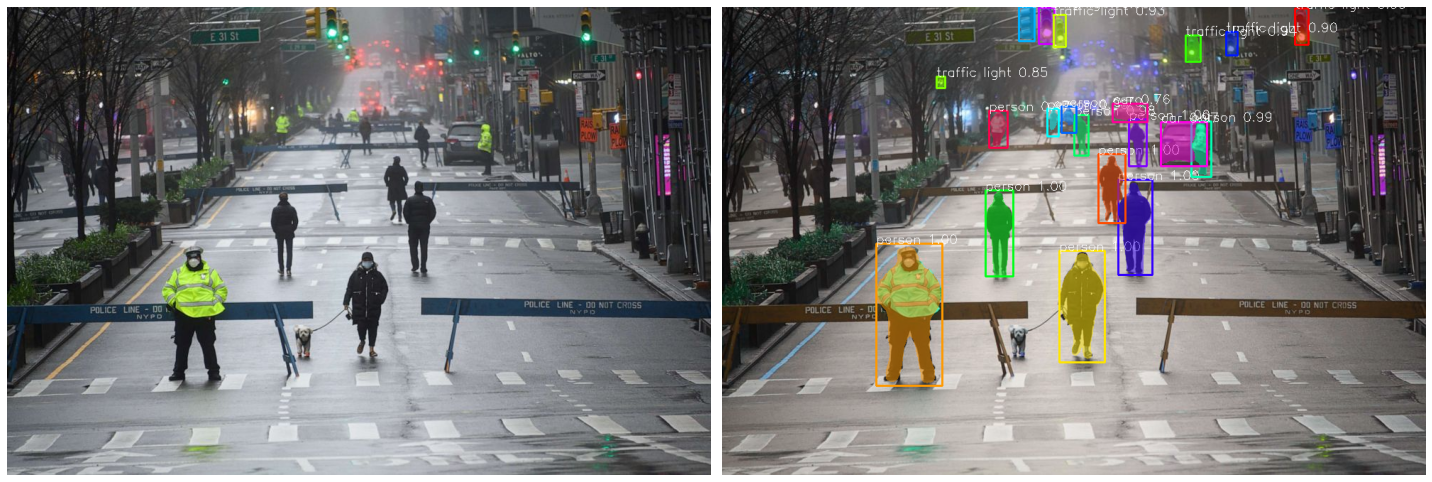

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(20, 20))
[axes.axis('off') for axes in axs]

axs[0].imshow(original_img)
axs[1].imshow(seg_res)

plt.tight_layout()
plt.show()